In [ ]:
#Import the libraries
!pip install tweepy
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
plt.style.use('seaborn-paper')
from textblob import TextBlob
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer    #Vectorization
from html import unescape   #throw 'trash' words

#from twython import Twython
import tweepy as tw
from tweepy import OAuthHandler
from tweepy import Cursor


 # Twitter Api Credentials
CONSUMER_KEY =  "Fg6Ej9WnRFjZzm1AKvN7ywLST"
CONSUMER_SECRET = "A1xKVrqzp3Nz8U7m5CdRy4iwFuQI7oAOoFvNTkxAkQJxDY49Pk"
ACCESS_TOKEN = "1399453426552037377-nOKXDhmum69Dshc9kyIABom2LRVsqM"
ACCESS_TOKEN_SECRET =  "oeD0DX4Z7IGTibMWsPd3Z5oZ8wFwJAQsuMkE0RknR8MDH"



In [ ]:
# Create the authentication object
auth = tw.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET )
# Set the access token and access token secret
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

In [ ]:
api = tw.API(auth)

In [ ]:
numb_of_tweets = 500
tweets = []
likes = []
time = []
user = []

for status in tw.Cursor(api.user_timeline, id= 'olgagerovasili', tweet_mode= 'extended').items(numb_of_tweets):
      tweets.append(status.full_text)
      likes.append(status.favorite_count)
      time.append(status.created_at)
      hashtags.append(status.entities)
      user.append(status.user)








In [ ]:
user

In [ ]:
#Creation of dataframe with 3 columns
df = pd.DataFrame({'tweets':tweets , 'likes':likes , 'time':time})
df



,tweets,likes,time
0,Η ζωή μετά το Νομοσχέδιο Χατζηδάκη.\n➡Κυριακή ...,35,2021-06-08 18:50:33
1,RT @atsipras: Δεν είναι στροφή προς το μέλλον ...,0,2021-06-08 18:33:42
2,Μια δημοκρατική και ευνομούμενη κοινωνία οφείλ...,67,2021-06-07 17:42:03
3,RT @syriza_gr: Όχι στη φθηνή και ελαστική εργα...,0,2021-06-07 15:41:00
4,Να πάρουν…μόνιμο ρεπό! #Aρθρο @dimokratikifoni...,76,2021-06-05 19:33:03
...,...,...,...
495,RT @syriza_gr: Ο κ. Μητσοτάκης μετά τις διακοπ...,0,2021-02-06 17:18:10
496,Κυβέρνηση επιτελικής αυθαιρεσίας! https://t.co...,80,2021-02-06 10:31:35
497,RT @syriza_gr: Ο κ. Μητσοτάκης εξελίσσεται σε ...,0,2021-02-05 20:01:01
498,RT @syriza_gr: Ο κ. Μητσοτάκης ένα χρόνο σχεδό...,0,2021-02-05 20:00:32


In [ ]:
#Show all the tweets to "see the whole picture"
pd.set_option('display.max_rows', df.shape[0]+1)
print(df)

                                                tweets  ...                time
0    Η ζωή μετά το Νομοσχέδιο Χατζηδάκη.\n➡Κυριακή ...  ... 2021-06-08 18:50:33
1    RT @atsipras: Δεν είναι στροφή προς το μέλλον ...  ... 2021-06-08 18:33:42
2    Μια δημοκρατική και ευνομούμενη κοινωνία οφείλ...  ... 2021-06-07 17:42:03
3    RT @syriza_gr: Όχι στη φθηνή και ελαστική εργα...  ... 2021-06-07 15:41:00
4    Να πάρουν…μόνιμο ρεπό! #Aρθρο @dimokratikifoni...  ... 2021-06-05 19:33:03
5    Δυστυχώς το συγκεκριμένο νόμισμα έχει δύο όψει...  ... 2021-06-05 12:53:06
6    Σε θέματα υψηλής ευαισθησίας οφείλουμε να είμα...  ... 2021-06-05 12:52:41
7    Ο Μητσοτάκης φοβάται τους βουλευτές του. #Συνε...  ... 2021-06-04 13:37:10
8    Η κυβέρνηση βγάζει στο σφυρί τις ζωές των εργα...  ... 2021-06-04 08:24:42
9    RT @atsipras: Ομιλία στην εκδήλωση του ΣΥΡΙΖΑ ...  ... 2021-06-03 17:33:22
10   Το ζητούμενο για εμάς είναι οι Έλληνες πολίτες...  ... 2021-06-03 16:06:12
11   Είναι τραγικό ότι ο ΠΘ και η κυβέρν

In [ ]:
#type of variables
df.dtypes

tweets            object
likes              int64
time      datetime64[ns]
dtype: object

In [ ]:
#divide year month and day to different columns
df['year'] = pd.DatetimeIndex(df['time']).year
df['month'] = pd.DatetimeIndex(df['time']).month
df['day'] = pd.DatetimeIndex(df['time']).day
df

,tweets,likes,time,year,month,day
0,Η ζωή μετά το Νομοσχέδιο Χατζηδάκη.\n➡Κυριακή ...,35,2021-06-08 18:50:33,2021,6,8
1,RT @atsipras: Δεν είναι στροφή προς το μέλλον ...,0,2021-06-08 18:33:42,2021,6,8
2,Μια δημοκρατική και ευνομούμενη κοινωνία οφείλ...,67,2021-06-07 17:42:03,2021,6,7
3,RT @syriza_gr: Όχι στη φθηνή και ελαστική εργα...,0,2021-06-07 15:41:00,2021,6,7
4,Να πάρουν…μόνιμο ρεπό! #Aρθρο @dimokratikifoni...,76,2021-06-05 19:33:03,2021,6,5
...,...,...,...,...,...,...
495,RT @syriza_gr: Ο κ. Μητσοτάκης μετά τις διακοπ...,0,2021-02-06 17:18:10,2021,2,6
496,Κυβέρνηση επιτελικής αυθαιρεσίας! https://t.co...,80,2021-02-06 10:31:35,2021,2,6
497,RT @syriza_gr: Ο κ. Μητσοτάκης εξελίσσεται σε ...,0,2021-02-05 20:01:01,2021,2,5
498,RT @syriza_gr: Ο κ. Μητσοτάκης ένα χρόνο σχεδό...,0,2021-02-05 20:00:32,2021,2,5


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df.to_csv("/content/gdrive/My Drive/syriza.tsv", sep='\t')

In [ ]:
df['tweets']

0      Η ζωή μετά το Νομοσχέδιο Χατζηδάκη.\n➡Κυριακή ...
1      RT @atsipras: Δεν είναι στροφή προς το μέλλον ...
2      Μια δημοκρατική και ευνομούμενη κοινωνία οφείλ...
3      RT @syriza_gr: Όχι στη φθηνή και ελαστική εργα...
4      Να πάρουν…μόνιμο ρεπό! #Aρθρο @dimokratikifoni...
5      Δυστυχώς το συγκεκριμένο νόμισμα έχει δύο όψει...
6      Σε θέματα υψηλής ευαισθησίας οφείλουμε να είμα...
7      Ο Μητσοτάκης φοβάται τους βουλευτές του. #Συνε...
8      Η κυβέρνηση βγάζει στο σφυρί τις ζωές των εργα...
9      RT @atsipras: Ομιλία στην εκδήλωση του ΣΥΡΙΖΑ ...
10     Το ζητούμενο για εμάς είναι οι Έλληνες πολίτες...
11     Είναι τραγικό ότι ο ΠΘ και η κυβέρνηση δεν κατ...
12     Το Σ/Ν για τα εργασιακά κατατίθεται αύριο. Παρ...
13     Η ΝΔ πιστεύει ότι η φτηνή εργασία θα φέρει ανά...
14     ➡Tώρα στο ρ/σ @_Alpha989 συζητάμε με τον Β. Σκ...
15                               https://t.co/tAWr8O8MWb
16     Με 2η λαθροχειρία του υφ. Παιδείας σήμερα, θολ...
17     Η Νέα Δημοκρατία την ώρα

In [ ]:
## Create a function to clean the tweets
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9_]+', '', text)   #Removing @mentions
  text = re.sub('#[A-Za-z0-9_]+', '', text)          #Removing "#" hash tag
  text = re.sub('RT[\s]+', '', text)     #Removing RT
  text = re.sub(r"\S*https?:\S*", "", text)  #Removing hyperling
  text = re.sub('amp','', text)      #Removing amp symbol
  text = re.sub('&gt;&gt;','', text)
  text = re.sub('\n', '', text)    #Removing special characters
  #text = re.sub('ProstasiaPoliti', '', text)
  #text = tweets.str.replace(['alpha', 'anatropi','ekloges2015', 'm.χρυσοχοιδης', 'megatvsk', 'nea_arxi', 'pasok','refugees', 'socialdeal', 'via'],"", text)

# Return the cleaned text
  return text
#Clean the tweets
df['tweets'] = df['tweets'].apply(cleanTxt)
#Show the cleaned tweets
df.head(30)

,tweets,likes,time,year,month,day
0,Η ζωή μετά το Νομοσχέδιο Χατζηδάκη.➡Κυριακή σα...,35,2021-06-08 18:50:33,2021,6,8
1,: Δεν είναι στροφή προς το μέλλον η κατάργηση ...,0,2021-06-08 18:33:42,2021,6,8
2,Μια δημοκρατική και ευνομούμενη κοινωνία οφείλ...,67,2021-06-07 17:42:03,2021,6,7
3,: Όχι στη φθηνή και ελαστική εργασία.Όχι στην ...,0,2021-06-07 15:41:00,2021,6,7
4,Να πάρουν…μόνιμο ρεπό! ρθρο,76,2021-06-05 19:33:03,2021,6,5
5,Δυστυχώς το συγκεκριμένο νόμισμα έχει δύο όψει...,20,2021-06-05 12:53:06,2021,6,5
6,Σε θέματα υψηλής ευαισθησίας οφείλουμε να είμα...,27,2021-06-05 12:52:41,2021,6,5
7,Ο Μητσοτάκης φοβάται τους βουλευτές του. #Συνε...,10,2021-06-04 13:37:10,2021,6,4
8,Η κυβέρνηση βγάζει στο σφυρί τις ζωές των εργα...,14,2021-06-04 08:24:42,2021,6,4
9,: Ομιλία στην εκδήλωση του ΣΥΡΙΖΑ - Προοδευτικ...,0,2021-06-03 17:33:22,2021,6,3


In [ ]:
#Drop the time column
df.drop(['time'], axis= 1, inplace =True)
df.head()

,tweets,likes,year,month,day
0,Η ζωή μετά το Νομοσχέδιο Χατζηδάκη.➡Κυριακή σα...,35,2021,6,8
1,: Δεν είναι στροφή προς το μέλλον η κατάργηση ...,0,2021,6,8
2,Μια δημοκρατική και ευνομούμενη κοινωνία οφείλ...,67,2021,6,7
3,: Όχι στη φθηνή και ελαστική εργασία.Όχι στην ...,0,2021,6,7
4,Να πάρουν…μόνιμο ρεπό! ρθρο,76,2021,6,5


In [ ]:
#The top-10 most liked tweets
mostlike = df.loc[df.likes.nlargest(10).index]
mostlike

,tweets,likes,year,month,day
466,Κα #Κεραμεως έχω δύο παιδιά στο #Πανεπιστήμιο....,945,2021,2,10
358,Αυτό εννοούσε η #Νέα_Δημοκρατία ότι θα λύσει τ...,440,2021,3,7
483,Σήμερα ο κ. Κικίλιας εισηγείται στην επιτροπή ...,265,2021,2,9
492,Ετοιμάζοντας τη νέα διαφήμιση του ΕΟΤ!! #Ικαρια,263,2021,2,7
301,"Αλήθεια κ. Μητσοτάκη, υπάρχει ένα μέτρο περιορ...",257,2021,3,15
335,Χθες παραβατικά στοιχεία έδρασαν εμπρηστικά κα...,248,2021,3,10
448,Έφυγε ο Αντώνης #Καλογιαννης αφήνοντας... ανοι...,226,2021,2,11
349,Η ελληνική αστυνομία έκανε μεγάλο κόπο για να ...,214,2021,3,8
333,Οι πολίτες δεν μπορεί να κινδυνεύουν κάθε φορά...,205,2021,3,10
190,Δεν υπάρχει πουθενά το εκλογικό σύστημα που πρ...,195,2021,4,13


In [ ]:
df[["likes"]].describe()

,likes
count,500.000000
mean,38.230000
std,66.548588
min,0.000000
25%,0.000000
50%,15.000000
75%,53.000000
max,945.000000


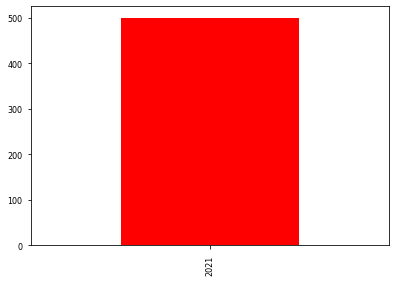

In [ ]:
#Tweets per year
df['year'].value_counts(ascending=True).plot(kind='bar', color='r')



In [ ]:

text = df[df['year']==2021]['tweets'].str.cat(sep = ' ')
text


'Η ζωή μετά το Νομοσχέδιο Χατζηδάκη.➡Κυριακή σαν Δευτέρα.➡10ωρη δουλειά, 2 ώρες λιγότερη ζωή.➡Απολύθηκες παράνομα; Δεν επαναπροσλαμβάνεσαι!➡Περισσότερες υπερωρίες, πιο άδεια τσέπη.  : Δεν είναι στροφή προς το μέλλον η κατάργηση των εργασιακών δικαιωμάτων και η πληρωμή με ρεπό. Δεσμεύομαι ότι αυτές οι βαθιά α… Μια δημοκρατική και ευνομούμενη κοινωνία οφείλει να προασπίζει το δικαίωμα των πολιτών στην ασφάλεια : Όχι στη φθηνή και ελαστική εργασία.Όχι στην κατάργηση του 8ωρου.Ασταμάτητα δουλεύουν μόνο τα ρολόγια.Την Πέμπτη 10/6, απε… Να πάρουν…μόνιμο ρεπό! ρθρο     Δυστυχώς το συγκεκριμένο νόμισμα έχει δύο όψεις: τη λαμπερή – που είναι και η απατηλή- αλλά κατάντησε αποκρουστική, που ακουμπά στην πραγματικότητα. Γιατί πως αλλιώς θα μπορούσε να χαρακτηρίσει κάποιος το γεγονός ότι ένα παιδί στέλνεται ανενδοίαστα στη μηχανή του κιμά;  Σε θέματα υψηλής ευαισθησίας οφείλουμε να είμαστε προσεκτικοί και να στεκόμαστε με σεβασμό απέναντι στην ανθρώπινη δυστυχία. Και προφανώς δεν μπορούμε να τα χρη

In [ ]:
list(STOPWORDS)[0:10]

['have',
 'and',
 'any',
 "weren't",
 'being',
 'the',
 'those',
 'http',
 "she'd",
 'our']

In [ ]:
#Search the greek stopwords
c

In [ ]:
!python -m spacy download el_core_news_sm
#Run it and after do this: Runtime ->  Restart Runtime, to see the changes...

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
#Greek stopwords are included in this list
list(nlp.Defaults.stop_words)[0:10]

['αντίς',
 'πολύ',
 'κάποιοι',
 'προχθές',
 'τούτον',
 'τρεις',
 'μερικές',
 'άνω',
 'με',
 'δα']

In [ ]:
GreekStopwords = nlp.Defaults.stop_words

In [ ]:
#Save the greek stopwords in a variables
NewStopWords = list(GreekStopwords)


In [ ]:
wordcloud = WordCloud(stopwords = NewStopWords, width = 700, height = 400, max_words = 20, background_color = 'white').generate(text)

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'dodgerblue',
    edgecolor = 'red')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#lemmatization : the process of returning the base or dictionary form of a word (lemma)

In [ ]:
#for every word in tweet...
doc = nlp(text)
for token in doc:       #for every word in tweet...
    print(token.lemma_)


In [ ]:
#Print a new text with the word and its lemma
new_text = ''
for token in doc:               #token = λέξη , token.lema = λίμα/ρίζα λέξης
    print(token, "" , token.lemma_)
    new_text = new_text + '' + token.lemma_


In [ ]:
new_text

In [ ]:
#Recreate the above whole tweets by replacing the word with its lemma
text = ' '.join(token.lemma_ for token in doc)
text

In [ ]:
#Store the clear-lemmatized tweets in a variable
full_doc = nlp(text)
full_doc

η ζωή μετά το νομοσχέδιο χατζηδάκη. ➡ κυριακή σαν δευτέρα. ➡ 10ωρη δουλειά , 2 ώρες λιγότερη ζωή. ➡ Απολύθηκες παράνομα ; δεν επαναπροσλαμβάνεσαι! ➡ περισσότερες υπερωρία , πιο άδειος τσέπη .   : δεν είναι στροφή προς το μέλλον η κατάργηση των εργασιακός δικαιωμάτο και η πληρωμή με ρεπό . δεσμεύομαι ότι αυτές οι βαθιά α … μια δημοκρατικός και ευνομούμενη κοινωνία οφείλω να προασπίζω το δικαίωμα των πολιτά στην ασφάλεια : όχι στη φθηνός και ελαστικός εργασία . όχι στην κατάργηση του 8ωρο . ασταμάτητας δουλεύω μόνο τα ρολόγι . την Πέμπτη 10/6 , απε … να πάρω … μόνιμος ρεπό ! ρθρο      δυστυχώς το συγκεκριμένος νόμισμα έχω δύο όψει : τη λαμπερή – που είναι και η απατηλός - αλλά κατάντησε αποκρουστικός , που ακουμπώ στην πραγματικότητα . γιατί πως αλλιώς θα μπορώ να χαρακτηρίσω κάποιος το γεγονός ότι ένα παιδί στέλνομαι ανενδοίαστα στη μηχανή του κιμά ;   σε θέματας υψηλή ευαισθησία οφείλω να είμαστε προσεκτικός και να στεκόμαστε με σεβασμό απέναντι στην ανθρώπινη δυστυχία . και προφανώς δ

In [ ]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [ ]:
clear_text[300:600]

In [ ]:
wordcloud = WordCloud(stopwords = NewStopWords, width = 700, height = 400, max_words = 60, background_color = 'white').generate(clear_text)

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'dodgerblue',
    edgecolor = 'red')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

VECTORIZATION

In [ ]:
cv = CountVectorizer()

In [ ]:
#transform from text to vector
count_vector = cv.fit_transform(df['tweets'])

In [ ]:
#2788 words in 500 tweets
count_vector.shape

(500, 3194)

In [ ]:
def my_tokenizer(doc):
   # apply the preprocessing and tokenization steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]

    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names())

results.head()

,00,000,02,03,04,05,06,09,10,100,10ωρη,11,12,12000,13,15,157,17,18,185,19,1950,19ο,20,200,2019,2020,2021,21,22,23χρονο,25000,28,29,2η,30,35,350,40,400,...,ωρο,ως,ωστόσο,όλα,όλγα,όλες,όλη,όλο,όλοι,όλους,όλων,όμως,όπλα,όπλο,όποια,όποιον,όποιος,όπου,όπως,όρθια,όρθιες,όριά,όρια,όρο,όρους,όσα,όσες,όσο,όσους,όταν,ότι,όφελος,όχι,όψεις,ύπαρξη,ύπαρξης,ύστατη,ώρα,ώρες,ώστε
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Remove stopwords and very rare or frequent words
cv = CountVectorizer(stop_words= NewStopWords, min_df=0.01, max_df=0.95,tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['tweets'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασ', 'έκαστας', 'έκαστε', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπο', 'αλλιώτικας', 'αλλοιώτικας', 'αφότο', 'βεβαιότατας', 'γρήγορας', 'δίχω', 'εαυτής', 'εκάστα', 'εκάστο', 'ευθύ', 'εχτή', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνε', 'ολωσδιόλο', 'ολόγυρο', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποιέ', 'ποιώ', 'πολλός', 'προχθέ', 'προχτής', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'ταύτε', 'ταύτο', 'τούτε', 'όποιας', 'όσε'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
#vectorize the words and create dataframe
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names())
results


,,...,2021,έγκλημας,ένταση,έπρεπε,έργο,αλέξη,ανάγκη,ανάκαμψη,ανάπτυξη,αντιμετώπιση,αντιπολίτευση,απάντηση,αποτελώ,αποτυχία,αρχή,αστυνομία,αστυνομικός,ασφάλεια,ατζέντα,βάλω,βάρος,βία,βλέπω,βουλή,βουλευτής,βουλη,βρίσκομαι,βρισκόμαστε,γίνομαι,γίνω,γεροβασίλη,γραφείο,γραφείος,δήλωση,δίνω,δευτερολογία,δηλώσει,δημοκρατία,...,πρόταση,σήμερα,σημείο,σμύρνη,στάση,σταθμός,στελεχή,στι,στιγμή,στρατηγική,συζήτηση,συζητάμε,συζητώ,συμμαχία,συνέντευξη,συνεντευξη,συριζας,σχέδιο,σχολιάζω,σύστημα,τεστ,τηλεοπτικός,τηλεόραση,τσίπρα,τύπου,υγεία,υγειονομικά,υγειονομικός,υπάρχω,υπουργείο,υπουργό,υπουργός,φοβάται,φορά,χθες,χιλιάδες,χρόνο,χώρα,ψηφοφορία,ώρα
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [ ]:
def my_tokenizer(doc):
   # apply the preprocessing and tokenization steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]

    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [ ]:
 cv = CountVectorizer(stop_words= NewStopWords, min_df=0.01, max_df=0.95, max_features=30, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(df['tweets'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names())



/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασ', 'έκαστας', 'έκαστε', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπο', 'αλλιώτικας', 'αλλοιώτικας', 'αφότο', 'βεβαιότατας', 'γρήγορας', 'δίχω', 'εαυτής', 'εκάστα', 'εκάστο', 'ευθύ', 'εχτή', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνε', 'ολωσδιόλο', 'ολόγυρο', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποιέ', 'ποιώ', 'πολλός', 'προχθέ', 'προχτής', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'ταύτε', 'ταύτο', 'τούτε', 'όποιας', 'όσε'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
 #Drop all the unwanted words and numbers
results.head(10)

,βία,βουλή,βουλευτής,δημοκρατία,εκπομπή,ερώτηση,κάνω,κοινωνία,κυβέρνηση,μέτρο,μητσοτάκη,μπορώ,μπροστά,νέος,οικονομία,πανδημία,πολίτε,πολιτικός,προοδευτικός,σήμερα,συζήτηση,συμμαχία,συνέντευξη,συνεντευξη,συριζας,τσίπρα,τύπου,υγεία,υπάρχω,χώρα
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
#token_pattern = words who start with space, after ασ
cv = CountVectorizer( stop_words= NewStopWords, min_df=0.01, max_df=0.95, max_features=30, token_pattern = '\\bαστ[α-ωά-ώ]*\\b', tokenizer=my_tokenizer)
results.head()


,βία,βουλή,βουλευτής,δημοκρατία,εκπομπή,ερώτηση,κάνω,κοινωνία,κυβέρνηση,μέτρο,μητσοτάκη,μπορώ,μπροστά,νέος,οικονομία,πανδημία,πολίτε,πολιτικός,προοδευτικός,σήμερα,συζήτηση,συμμαχία,συνέντευξη,συνεντευξη,συριζας,τσίπρα,τύπου,υγεία,υπάρχω,χώρα
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= NewStopWords , max_features=20, ngram_range=(2, 2)   , tokenizer=my_tokenizer)

results.head()

,βία,βουλή,βουλευτής,δημοκρατία,εκπομπή,ερώτηση,κάνω,κοινωνία,κυβέρνηση,μέτρο,μητσοτάκη,μπορώ,μπροστά,νέος,οικονομία,πανδημία,πολίτε,πολιτικός,προοδευτικός,σήμερα,συζήτηση,συμμαχία,συνέντευξη,συνεντευξη,συριζας,τσίπρα,τύπου,υγεία,υπάρχω,χώρα
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


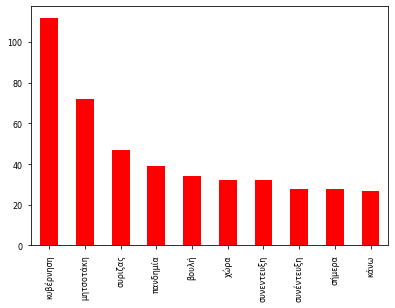

In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head(10).plot(kind='bar', color='r')


In [ ]:
cv = CountVectorizer( stop_words= NewStopWords, max_features=20, ngram_range=(1, 2), token_pattern = '\\b[εγκ-z0-9-_]*\\b', tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['tweets'])
#results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names())
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασ', 'έκαστας', 'έκαστε', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπο', 'αλλιώτικας', 'αλλοιώτικας', 'αφότο', 'βεβαιότατας', 'γρήγορας', 'δίχω', 'εαυτής', 'εκάστα', 'εκάστο', 'ευθύ', 'εχτή', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνε', 'ολωσδιόλο', 'ολόγυρο', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποιέ', 'ποιώ', 'πολλός', 'προχθέ', 'προχτής', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'ταύτε', 'ταύτο', 'τούτε', 'όποιας', 'όσε'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,βία,βουλή,βουλευτής,δημοκρατία,εκπομπή,ερώτηση,κάνω,κοινωνία,κυβέρνηση,μέτρο,μητσοτάκη,μπορώ,μπροστά,νέος,οικονομία,πανδημία,πολίτε,πολιτικός,προοδευτικός,σήμερα,συζήτηση,συμμαχία,συνέντευξη,συνεντευξη,συριζας,τσίπρα,τύπου,υγεία,υπάρχω,χώρα
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
results.sum(axis =0).sort_values(ascending = False).plot()

In [ ]:
cv = CountVectorizer( stop_words= NewStopWords, max_features=20, ngram_range=(1, 2),
                     vocabulary = ['πανδημία', 'δημοκρατία','έγκλημα'] , tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['tweets'])
#results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names())
results.head()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= NewStopWords, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(df['tweets'])  #finds the tfidf score with normalization

In [ ]:
#results_clean = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names())
results.head()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))
 #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.09980694 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.22510822 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.15945277 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.12453033 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.13282679 0.      

In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))

cosine scores ==>  [[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.08873073 0.        ]
 [0.         0.         0.         ... 0.08873073 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

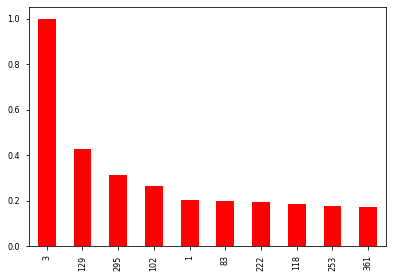

In [ ]:
#Which tweets are similar with the 3rd tweet?
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(10).plot(kind = 'bar',color='r')

In [ ]:
df['tweets'].loc[3]


': Όχι στη φθηνή και ελαστική εργασία.Όχι στην κατάργηση του 8ωρου.Ασταμάτητα δουλεύουν μόνο τα ρολόγια.Την Πέμπτη 10/6, απε…'

In [ ]:
df['tweets'].loc[129]

': Ασταμάτητα δουλεύουν μόνο τα ρολόγια, Πέμπτη 6 Μαΐου απεργούμε.11.00 π.μ, Πλατεία Κλαυθμώνος. '